In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer

In [3]:
#read in our dataset
df = pd.read_excel('breach_report.csv')
df.columns

Index(['Name of Covered Entity', 'State', 'Covered Entity Type',
       'Individuals Affected', 'Breach Submission Date', 'Type of Breach',
       'Location of Breached Information', 'Business Associate Present',
       'Web Description'],
      dtype='object')

In [4]:
df

,Name of Covered Entity,State,Covered Entity Type,Individuals Affected,Breach Submission Date,Type of Breach,Location of Breached Information,Business Associate Present,Web Description
0,Adventist HealthCare,MD,Healthcare Provider,1300,2025-11-13,Loss,Paper/Films,Yes,NaN
1,Synergy Advanced Healthcare LLC,CT,Healthcare Provider,1260,2025-11-04,Unauthorized Access/Disclosure,Electronic Medical Record,No,NaN
2,Saint Maryâ€™s Home of Erie,PA,Healthcare Provider,501,2025-10-24,Hacking/IT Incident,Network Server,No,NaN
3,Conduent Business Services LLC,NJ,Business Associate,42616,2025-10-08,Hacking/IT Incident,Network Server,Yes,NaN
4,"Revere Health, PC",UT,Healthcare Provider,10800,2025-10-02,Hacking/IT Incident,Network Server,No,NaN
...,...,...,...,...,...,...,...,...,...
733,Premier Health Partners and wholly owned cover...,OH,Healthcare Provider,10833,2023-10-12,Hacking/IT Incident,Network Server,No,NaN
734,"Aspen Dental Management, Inc.",NY,Business Associate,62183,2023-08-18,Hacking/IT Incident,Network Server,Yes,NaN
735,"TAG Urgent Care Support Services, LLC",NY,Business Associate,516985,2023-08-18,Hacking/IT Incident,Network Server,Yes,NaN
736,"ProSmile Holdings, LLC",NJ,Business Associate,39674,2023-03-28,Hacking/IT Incident,Email,Yes,NaN


**Cleaning**

In [5]:
df.drop('Web Description', axis=1, inplace=True) #drop irrelevant columns
df.drop('Name of Covered Entity', axis=1,inplace=True)
'''for col in df.columns:
  df[col] = df[col].astype(str).replace({'$': '', ',': '', '-': '', '—': ''}, regex=True)
df = df.dropna(axis=1, how='all')
df'''
#removing symbols in the numeric column
numeric_clean_cols = ['Individuals Affected']

for col in numeric_clean_cols:
    df[col] = (df[col].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)) #cast as string, replace symbols
    df[col] = pd.to_numeric(df[col], errors='coerce') #cast as number

In [6]:
#making columns numerical
df['Individuals Affected'] = pd.to_numeric(df['Individuals Affected'], errors='coerce')
df['Breach Submission Date'] = pd.to_datetime(df['Breach Submission Date'], errors='coerce')
df

,State,Covered Entity Type,Individuals Affected,Breach Submission Date,Type of Breach,Location of Breached Information,Business Associate Present
0,MD,Healthcare Provider,1300,2025-11-13,Loss,Paper/Films,Yes
1,CT,Healthcare Provider,1260,2025-11-04,Unauthorized Access/Disclosure,Electronic Medical Record,No
2,PA,Healthcare Provider,501,2025-10-24,Hacking/IT Incident,Network Server,No
3,NJ,Business Associate,42616,2025-10-08,Hacking/IT Incident,Network Server,Yes
4,UT,Healthcare Provider,10800,2025-10-02,Hacking/IT Incident,Network Server,No
...,...,...,...,...,...,...,...
733,OH,Healthcare Provider,10833,2023-10-12,Hacking/IT Incident,Network Server,No
734,NY,Business Associate,62183,2023-08-18,Hacking/IT Incident,Network Server,Yes
735,NY,Business Associate,516985,2023-08-18,Hacking/IT Incident,Network Server,Yes
736,NJ,Business Associate,39674,2023-03-28,Hacking/IT Incident,Email,Yes


**Encoding**

In [7]:
#Binary encoding (y/n): business associate present
#Label encoding: State, covered entity type, location of breach information, type of breach

'''encoder = LabelEncoder()
df['Location of Breached Information Encoded'] = encoder.fit_transform(df['Location of Breached Information'])
df['State Encoded'] = encoder.fit_transform(df['State'])
df['Covered Entity Type Encoded'] = encoder.fit_transform(df['Covered Entity Type'])'''


cat_cols = ['Location of Breached Information', 'State', 'Covered Entity Type', 'Type of Breach'] #these will be label encoded

for col in cat_cols:
    if col in df.columns:
        le = LabelEncoder()
        df[col + " Encoded"] = le.fit_transform(df[col].astype(str)) #label encode each categorical column

if 'Business Associate Present' in df.columns:
  df['Business Associate Present'] = df['Business Associate Present'].map({'Yes': 1, 'No': 0}) #binary encode


DECISION TREE MODEL

C:\Users\aadit\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aadit\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


VANILLA METRICS
vanilla accuracy: 0.8918918918918919
vanilla precision: 0.8822085166561912
vanilla recall: 0.8918918918918919
vanilla f1 score: 0.8856505862480125
Best parameters according to grid search: {'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 20}
Best accuracy: 0.9016949152542374
TUNED METRICS
tuned accuracy: 0.9054054054054054
tuned precision: 0.8879588543767648
tuned recall: 0.9054054054054054
tuned f1 score: 0.8933830382106244


C:\Users\aadit\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


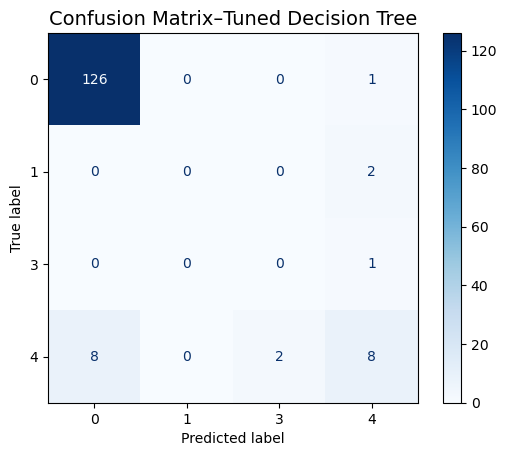

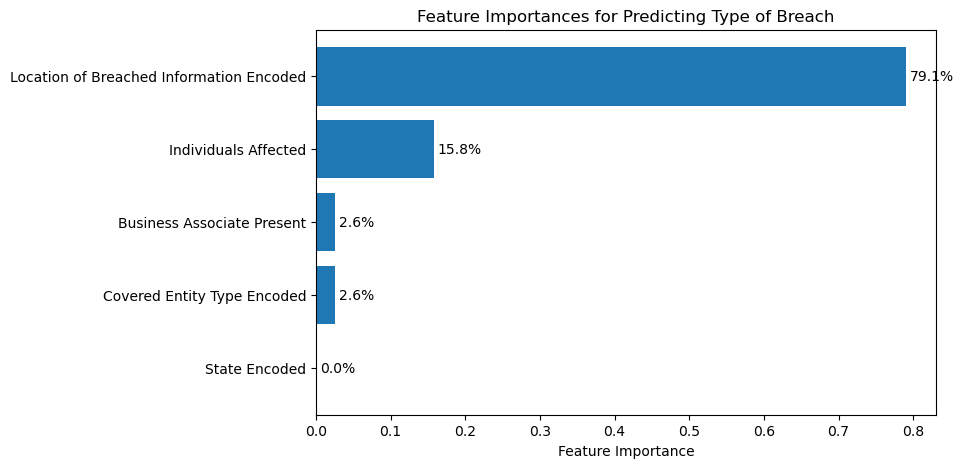

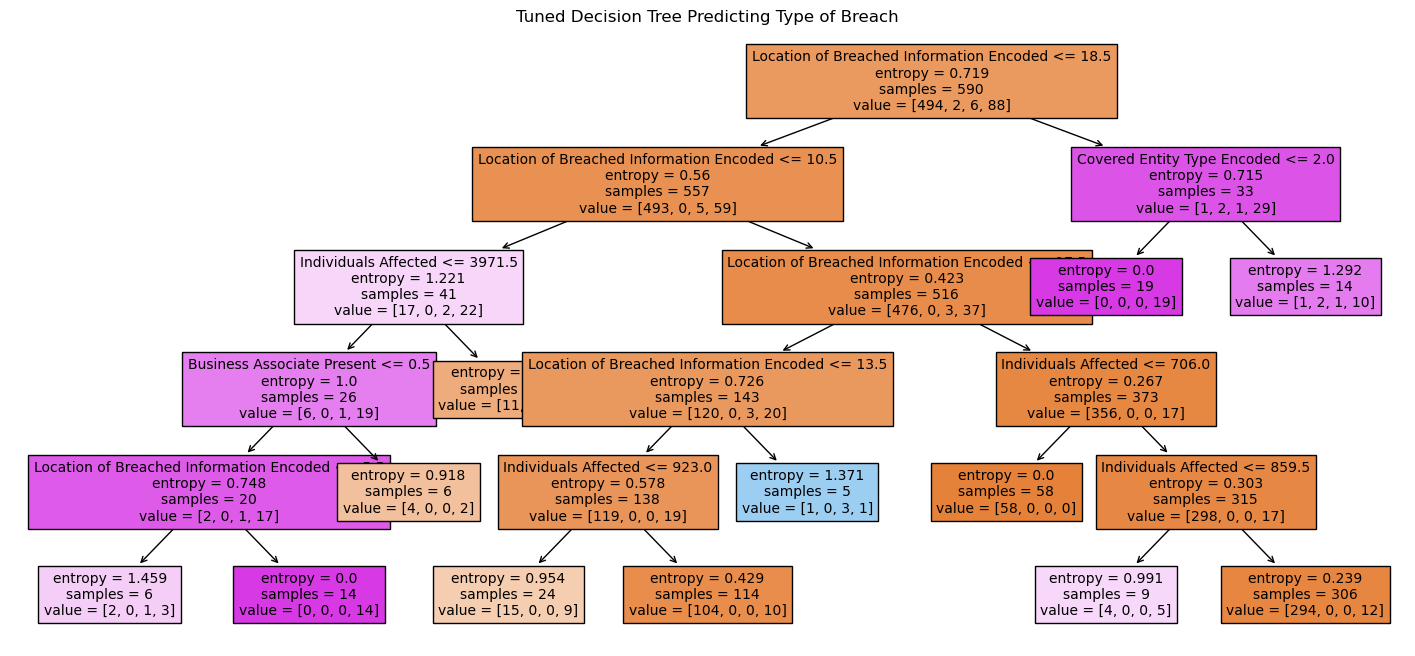

Vanilla and Tuned Model Metrics:
           Vanilla Model  Tuned Model
Accuracy        0.891892     0.905405
Precision       0.882209     0.887959
Recall          0.891892     0.905405
F1 Score        0.885651     0.893383


In [8]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#want to use decision tree to predict type of breach

#split the target
y_clean = df["Type of Breach Encoded"]
X_clean = df[["State Encoded", "Covered Entity Type Encoded", "Individuals Affected", "Location of Breached Information Encoded", "Business Associate Present"]]

#train test split
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=3001)

#initial vanilla decision tree model 
vanilla_tree=DecisionTreeClassifier(random_state=3001)
vanilla_tree.fit(X_train, y_train)
y_pred = vanilla_tree.predict(X_test)

# report metrics of vanilla tree:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted')
rec = recall_score(y_test, y_pred, average='weighted')
f1score = f1_score(y_test, y_pred, average= 'weighted')

print('VANILLA METRICS')
print("vanilla accuracy: "+str(acc))
print("vanilla precision: "+str(prec))
print("vanilla recall: "+str(rec))
print("vanilla f1 score: "+str(f1score))


#TUNING HYPERPARAMETERS: criterion, max depth, min sample split, min sample lead, max features
#performing grid search
grid_sear_param = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10, 20, 30],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': [None, 'sqrt', 'log2']
}

dt = DecisionTreeClassifier(random_state=3001)

grid = GridSearchCV(
    estimator=dt,
    param_grid=grid_sear_param,
    scoring='accuracy',   #maximizing accuracy
    n_jobs=-1     
)

grid.fit(X_train, y_train)

print("Best parameters according to grid search:", grid.best_params_)
print("Best accuracy:", grid.best_score_)

# metrics based on this tuned tree:
tuned_tree=DecisionTreeClassifier(random_state=3001, criterion='entropy', max_depth=5, max_features=None, min_samples_leaf=4, min_samples_split=20)
tuned_tree.fit(X_train, y_train)
y_pred_tuned = tuned_tree.predict(X_test)

# report metrics:
acc_tune = accuracy_score(y_test, y_pred_tuned)
prec_tune = precision_score(y_test, y_pred_tuned, average='weighted')
rec_tune = recall_score(y_test, y_pred_tuned, average='weighted')
f1score_tune = f1_score(y_test, y_pred_tuned, average= 'weighted')
print('TUNED METRICS')
print("tuned accuracy: "+str(acc_tune))
print("tuned precision: "+str(prec_tune))
print("tuned recall: "+str(rec_tune))
print("tuned f1 score: "+str(f1score_tune))


#confusion matrix for tuned tree
cm = confusion_matrix(y_test, y_pred_tuned)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tuned_tree.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix–Tuned Decision Tree", fontsize=14)
plt.show()

#plot the top features
importances = tuned_tree.feature_importances_
features = np.array(X_clean.columns)
sorte = np.argsort(importances)[::-1]
plt.figure(figsize=(8,5))

plt.barh(features[sorte], importances[sorte])
plt.xlabel('Feature Importance')
plt.title('Feature Importances for Predicting Type of Breach')
plt.gca().invert_yaxis()  # so biggest feature is at the top

for i, v in enumerate(importances[sorte]):
    plt.text(
        v + 0.005,         # x-position (slightly to the right of bar)
        i,                 # y-position (bar index)
        f"{v*100:.1f}%",   # format as percentage
        va='center'
    )


plt.show()





#visualize final tree
plt.figure(figsize=(18,8))
plot_tree(tuned_tree, filled=True, feature_names=list(X_clean.columns), fontsize=10)
plt.title('Tuned Decision Tree Predicting Type of Breach')
plt.show()

##printing table of metrics
metrics_table = {
    "Vanilla Model": [acc, prec, rec, f1score],
    "Tuned Model": [acc_tune, prec_tune, rec_tune, f1score_tune]
}

# Define row names (index labels)
row_names = ["Accuracy", "Precision", "Recall", "F1 Score"]

metric_df = pd.DataFrame(metrics_table, index=row_names)

# Display the DataFrame
print("Vanilla and Tuned Model Metrics:")
print(metric_df)




